In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from io import BytesIO
import requests
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from df2gspread import df2gspread as d2g
import vk_api
import random

%matplotlib inline

In [16]:
df = pd.read_csv('step_1_lesson_7.csv')
df_2 = pd.read_csv('step_2_lesson_7.csv')
df_3 = pd.read_csv('step_3_lesson_7.csv')
df_4 = pd.read_csv('step_4_lesson_7.csv')

In [76]:
df.head()

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0


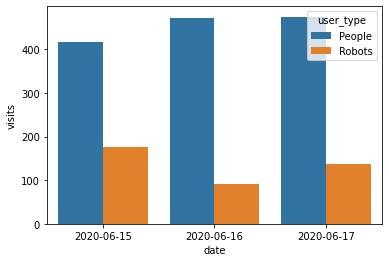

In [77]:
sns.barplot(x=df.date, y=df.visits, hue=df.user_type)

In [78]:
df_2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [79]:
round(df_2[df_2['browser'] == 'Google Chrome'].visits.sum() / df_2.visits.sum() * 100)

60

In [80]:
df_2[df_2['browser'] == 'Google Chrome'].visits.sum()

354.0

In [81]:
df_3

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [82]:
proportion = (df_3.groupby(['browser', 'user_type'])['visits'].sum() / df_3.groupby('browser')['visits'].sum()) \
                .reset_index() \
                .query('user_type == "Robots"') \
                .sort_values('visits',ascending=False)

In [83]:
proportion

,browser,user_type,visits
19,UCWEB,Robots,1.000000
16,Safari,Robots,0.536585
8,Firefox,Robots,0.534483
3,Chromium,Robots,0.500000
14,Opera,Robots,0.312500
10,Google Chrome,Robots,0.293785
6,Edge,Robots,0.200000
22,Yandex Browser,Robots,0.129630
18,Samsung Internet,Robots,0.111111
12,Mobile Safari,Robots,0.062500


In [17]:
df_4

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [18]:
df_4.assign(proportion=lambda x: round(x.visits / x.visits.sum() * 100, 1))

,date,browser,user_type,visits,proportion
0,2020-06-15,Google Chrome,People,250.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,17.5
2,2020-06-15,Yandex Browser,People,47.0,7.9
3,2020-06-15,Firefox,Robots,31.0,5.2
4,2020-06-15,Chrome Mobile,People,31.0,5.2
5,2020-06-15,Firefox,People,27.0,4.5
6,2020-06-15,Safari,Robots,22.0,3.7
7,2020-06-15,Safari,People,19.0,3.2
8,2020-06-15,Mobile Safari,People,15.0,2.5
9,2020-06-15,Opera,People,11.0,1.9


In [86]:
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df_5 = pd.read_csv(BytesIO(data))

In [88]:
df_5

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [91]:
df_5 = df_4.merge(df_5, on=['date', 'browser', 'user_type'], how='inner')

In [93]:
df_5

,date,browser,user_type,visits,users
0,2020-06-15,Google Chrome,People,250.0,240.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0
2,2020-06-15,Yandex Browser,People,47.0,44.0
3,2020-06-15,Firefox,Robots,31.0,29.0
4,2020-06-15,Chrome Mobile,People,31.0,30.0
5,2020-06-15,Firefox,People,27.0,26.0
6,2020-06-15,Safari,Robots,22.0,20.0
7,2020-06-15,Safari,People,19.0,17.0
8,2020-06-15,Mobile Safari,People,15.0,14.0
9,2020-06-15,Opera,People,11.0,10.0


In [95]:
visits_per_user_GC = df_5[df_5['browser'] == 'Google Chrome'].visits / df_5[df_5['browser'] == 'Google Chrome'].users

In [96]:
visits_per_user_GC

0    1.041667
1    1.000000
dtype: float64

In [20]:
path_to_credential = 'double-aleph-380802-e0cc62fedcbf.json' 

# Specify name of table in google sheets
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)
gs = gspread.authorize(credentials)
table_name = 'Test'
spreadsheet_key = '1G6dBbXjsFHlPrUN_LJwtCCh7IklusfolHV_x4SrkFEs'
work_sheet = gs.open(table_name)

In [21]:
data = work_sheet.sheet1.get_all_values()
data[0]

['', 'date', 'browser', 'user_type', 'visits']

In [22]:
data = pd.DataFrame(data,columns=data.pop(0))
data

,,date,browser,user_type,visits
0,0,2020-06-15,Google Chrome,People,250.0
1,1,2020-06-15,Google Chrome,Robots,104.0
2,2,2020-06-15,Yandex Browser,People,47.0
3,3,2020-06-15,Firefox,Robots,31.0
4,4,2020-06-15,Chrome Mobile,People,31.0
5,5,2020-06-15,Firefox,People,27.0
6,6,2020-06-15,Safari,Robots,22.0
7,7,2020-06-15,Safari,People,19.0
8,8,2020-06-15,Mobile Safari,People,15.0
9,9,2020-06-15,Opera,People,11.0


In [44]:
spreadsheet_key = '1G6dBbXjsFHlPrUN_LJwtCCh7IklusfolHV_x4SrkFEs'
wks_name = 'Test'
d2g.upload(df_4, spreadsheet_key, wks_name, credentials=credentials, row_names=True)

<Worksheet 'Test' id:0>

In [53]:
app_token = 'vk1.a.t2u1EKCZCKM-bxS_P7Fwm9hDQS2LI4sYyRyu39qTyvlc7E46a-v810xFxaAOO73GTWvk1E2PzFexUA2mwA382oZe2SfqYyaRvBRzFI4djO2xu1BMEsT324YUGptJlANV2dh8XBSWslNL8SjAsdD8YUZ77M1V8DSUjXPJ1ucVsGnyKG_3uACPyczfKBujWweb-T-PIiK_qZqWF1BY46aA6A'
chat_id = 1
my_id = 5307128
vk_session = vk_api.VkApi(token=app_token)
vk = vk_session.get_api()

In [60]:
vk.messages.send(user_id=my_id, 
                 random_id=random.randint(1,2**31), 
                 message='https://docs.google.com/spreadsheets/d/1G6dBbXjsFHlPrUN_LJwtCCh7IklusfolHV_x4SrkFEs/edit#gid=0')

4